# Pre-roll

In [588]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cleaning_functions as cf

In [589]:
def extract_domain(tag):
    # Count the number of occurrences of 'Domain:'
    domain_count = tag.count('Domain:')
    
    # If there are multiple 'Domain:', mark as "DUP"
    if domain_count > 1:
        return "DUP"
    # Otherwise, extract the Domain
    else:
        match = pd.Series(tag).str.extract(r'Domain: ([\w\s]+),')
        return match.iloc[0, 0]
    
def extract_type(tag):
    print(f"Processing tag: {tag}")  # Debugging print
    type_count = tag.count('Type:')
    
    if type_count > 1:
        print("Multiple 'Type:' found.")  # Debugging print
        return "DUP"
    elif type_count == 1:
        match = pd.Series(tag).str.extract(r'Type: (.+)$')
        print(f"Extracted match: {match}")  # Debugging print
        if not match.empty and match.iloc[0, 0] is not None:
            return match.iloc[0, 0]
        else:
            print("No match found.")  # Debugging print
            return None
    else:
        print("'Type:' not found.")  # Debugging print
        return None

# Read in

In [590]:
raw_read_csv = '../data/F2023.csv'
clean_read_csv = '../data/cleaned.csv'
duplicate_types_csv = '../data/double_entry_type.csv'
duplicate_domain_csv = '../data/double_entry_domain.csv'
class_info_csv = '../data/ClassInfo.csv'

In [591]:
# load f2023 data
clean_df = pd.read_csv(clean_read_csv)

# load class data
class_df = pd.read_csv(class_info_csv)

In [592]:
# ENSURE THAT ALL DUPLICATED ENTRIES HAVE BEEN TAKEN CARE OF
print(f"All entries in {duplicate_domain_csv} and {duplicate_types_csv} will be incorporated into the final analysis")

# types
try:    
    duplicate_types_df = pd.read_csv(duplicate_types_csv)
    print(f"Found {duplicate_types_csv}. Incorporating into final analysis")
except:
    print(f"Could not find {duplicate_types_csv}. Creating empty dataframe")

    # create empty dataframe with columns of clean_df  
    duplicate_types_df = pd.DataFrame(columns=clean_df.columns)

# domains
try: 
    duplicate_domains_df = pd.read_csv(duplicate_domain_csv)
    print(f"Found {duplicate_domain_csv}. Incorporating into final analysis")
except: 
    print(f"Could not find {duplicate_domain_csv}. Creating empty dataframe")

    # create empty dataframe with columns of clean_df  
    duplicate_domains_df = pd.DataFrame(columns=clean_df.columns)

All entries in ../data/double_entry_domain.csv and ../data/double_entry_type.csv will be incorporated into the final analysis
Found ../data/double_entry_type.csv. Incorporating into final analysis
Could not find ../data/double_entry_domain.csv. Creating empty dataframe


In [593]:
# combine clean and duplicates frames
combined_df = pd.concat([clean_df, duplicate_types_df, duplicate_domains_df], ignore_index=True)
combined_df.head(5)

# typecast column duration to timedelta
combined_df["Duration"] = pd.to_timedelta(combined_df["Duration"])

# typecast column date to datetime
combined_df["Start date"] = pd.to_datetime(combined_df["Start date"])
combined_df["End date"] = pd.to_datetime(combined_df["End date"])

print(combined_df.dtypes)

Unnamed: 0              object
Client                  object
Project                 object
Description             object
Start date      datetime64[ns]
Start time              object
End date        datetime64[ns]
End time                object
Duration       timedelta64[ns]
Tags                    object
Type                    object
Domain                  object
dtype: object


In [594]:
# join the class info to the combined dataframe
combined_df = combined_df.merge(class_df, left_on = 'Project', right_on = 'Toggl Name')
combined_df = combined_df.reset_index(drop=True)
combined_df.head(5)

,Unnamed: 0,Client,Project,Description,Start date,Start time,End date,End time,Duration,Tags,Type,Domain,Semester,Year,Professor,Department Code,Department Number,Class Name,Toggl Name
0,0,F2023,GenAI & Art,Banquet Slides,2023-08-21,10:57:04,2023-08-21,10:57:39,0 days 00:00:35,"Domain: School, Type: Implementing",Implementing,School,Fall,2023,"Lincoln Carr,Courtney Halls",HNRS,435A,Generative AI and Artificial Intelligence,GenAI & Art
1,1,F2023,GenAI & Art,Banquet Slides,2023-08-21,11:00:43,2023-08-21,11:19:58,0 days 00:19:15,"Domain: School, Type: Implementing",Implementing,School,Fall,2023,"Lincoln Carr,Courtney Halls",HNRS,435A,Generative AI and Artificial Intelligence,GenAI & Art
2,23,F2023,GenAI & Art,Understanding Comics,2023-08-28,20:19:40,2023-08-28,20:51:19,0 days 00:31:39,"Domain: School, Type: Reading",Reading,School,Fall,2023,"Lincoln Carr,Courtney Halls",HNRS,435A,Generative AI and Artificial Intelligence,GenAI & Art
3,27,F2023,GenAI & Art,Understanding Comics,2023-08-29,11:04:03,2023-08-29,11:36:34,0 days 00:32:31,"Domain: School, Type: Reading",Reading,School,Fall,2023,"Lincoln Carr,Courtney Halls",HNRS,435A,Generative AI and Artificial Intelligence,GenAI & Art
4,29,F2023,GenAI & Art,Week 1 Assignment,2023-08-29,20:04:11,2023-08-29,20:53:36,0 days 00:49:25,"Domain: School, Type: Writing",Writing,School,Fall,2023,"Lincoln Carr,Courtney Halls",HNRS,435A,Generative AI and Artificial Intelligence,GenAI & Art


# Analysis

### Analysis Pre-Roll

In [595]:
# constant variables
COLOR = 'skyblue'
ROTATION = 45

# plt specifics
plt.style.use('seaborn-notebook')
plt.rcParams['figure.figsize'] = (14, 6)

font = {'family': 'sans-serif', 
        'style': 'normal', 
        'weight': 'bold', 
        'size': 15}
plt.rc('font', **font)

# plot print function 
def print_plot(total_time_df, class_df, course, save = False): 
    plt.bar(total_time_df[total_time_df['Project'] == course]['Type'], total_time_df[total_time_df['Project'] == course]['Duration'], color = COLOR, 
            width = 0.4)
    plt.xlabel("Type", size = 14)
    plt.xticks(rotation=ROTATION)
    plt.ylabel("Time (hours)", size = 14)
    plt.title(f"Time Investment per Type of Work for {class_df[class_df['Toggl Name'] == course]['Class Name'].iloc[0]}"
              f" ({class_df[class_df['Toggl Name'] == course]['Department Code'].iloc[0]}{class_df[class_df['Toggl Name'] == course]['Department Number'].iloc[0]})"
              f"\nTotal Time: {total_time_df[total_time_df['Project'] == course]['Duration'].sum():.2f} hours", size = 18)

    # save plot
    if save:
        plt.savefig(f"../images/{course}.png", transparent=False, format = 'png')

    plt.show()

# stat print function
def calc_stats(total_time_df, course):
    # calculate percentages of time spent on each type of work
    total_time_df = total_time_df[total_time_df['Project'] == course]
    total_time = total_time_df['Duration'].sum()
    type_time_dict = {ty:total_time_df.loc[total_time_df['Type'] == ty, 'Duration'].sum() for ty in total_time_df['Type'].unique()}
    type_time_dict = {k: v for k, v in sorted(type_time_dict.items(), key=lambda item: item[1], reverse = True)}

    # printing statistics
    print_string = [f"Course: {course}, Total Time = {total_time:.2f} hours"]
    for ty in type_time_dict:
        type_time_dict[ty] = type_time_dict[ty] / total_time * 100
        type_total_time = total_time_df[total_time_df['Type'] == ty]['Duration'].sum()

        # find total hours spent on ty type 
        print_string.append(f"{ty}: {type_total_time:.2f} hours ({type_time_dict[ty]:.2f}%)")
    
    return "\n".join(print_string)

### Analysis for All Courses

In [596]:
# create a new dataframe with the total time per project
total_time_df = combined_df.groupby(['Project', 'Type', 'Class Name'], as_index=False)['Duration'].sum()

# sort by duration
total_time_df = total_time_df.sort_values(by=['Duration'], ascending=False)

# keep only the projects with the name OS, Algorithms, GenAI & Art, and SWE
total_time_df = total_time_df.loc[total_time_df['Project'].isin(['OS', 'Algorithms', 'GenAI & Art', 'SWE'])]

# convert the duration column to hours 
total_time_df['Duration'] = total_time_df['Duration'].dt.total_seconds() / 3600

# find the total time
total_time = total_time_df['Duration'].sum()

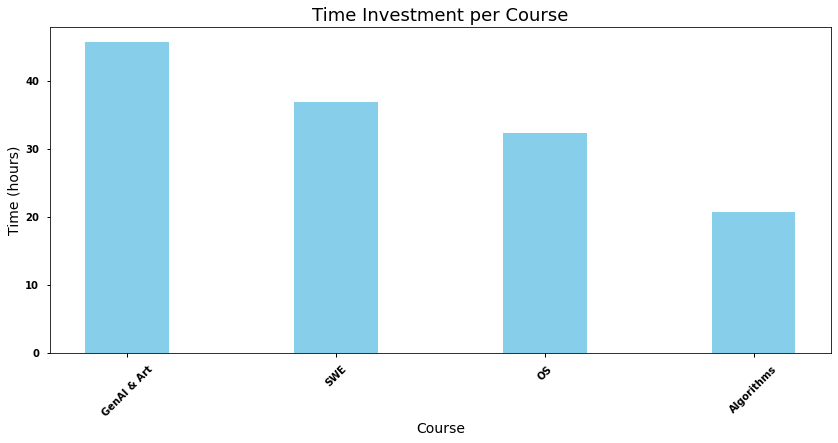

OS: 40.28 hours (20.04%)
GenAI & Art: 62.20 hours (30.94%)
SWE: 50.90 hours (25.32%)
Algorithms: 47.67 hours (23.71%)
TOTAL TIME : 201.06 hours


In [600]:
# create a bar chart of total time per project
plt.bar(total_time_df['Project'], total_time_df['Duration'], color = COLOR, 
        width = 0.4)
plt.xlabel("Course", size = 14)
plt.xticks(rotation=ROTATION)
plt.ylabel("Time (hours)", size = 14)
plt.title("Time Investment per Course", size = 18)
plt.show()

print_string = []
for course in set(total_time_df['Project']):
    course_total_time = total_time_df[total_time_df['Project'] == course]['Duration'].sum()
    print_string.append(f"{course}: {course_total_time:.2f} hours ({(course_total_time / total_time * 100):.2f}%)")
print_string.append("TOTAL TIME : {:.2f} hours".format(total_time))
print("\n".join(print_string))
    


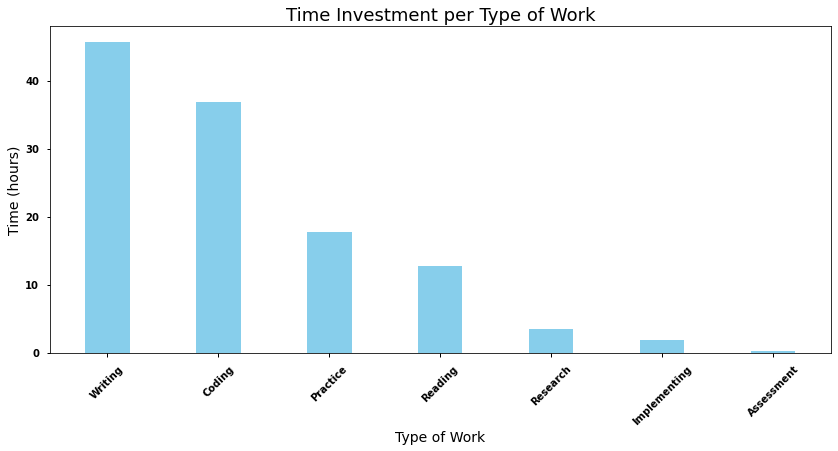

Coding: 90.02 hours (44.77%)
Writing: 55.12 hours (27.42%)
Practice: 25.90 hours (12.88%)
Reading: 24.07 hours (11.97%)
Research: 3.45 hours (1.71%)
Implementing: 2.20 hours (1.09%)
Assessment: 0.30 hours (0.15%)
TOTAL TIME : 201.06 hours


In [598]:
# create a bar chart of total time per type with the labels tilted
plt.bar(total_time_df['Type'], total_time_df['Duration'], color = COLOR, 
        width = 0.4)
plt.xlabel("Type of Work", size = 14)
plt.ylabel("Time (hours)", size = 14)
plt.xticks(rotation=ROTATION)
plt.title("Time Investment per Type of Work", size = 18)
plt.show()

# calculate percentages of time spent on each type of work
type_time_dict = {ty:total_time_df.loc[total_time_df['Type'] == ty, 'Duration'].sum() for ty in total_time_df['Type'].unique()}
type_time_dict = {k: v for k, v in sorted(type_time_dict.items(), key=lambda item: item[1], reverse = True)}

# printing statistics
print_string = []
for ty in type_time_dict:
    type_time_dict[ty] = type_time_dict[ty] / total_time * 100
    type_total_time = total_time_df[total_time_df['Type'] == ty]['Duration'].sum()
    print_string.append(f"{ty}: {type_total_time:.2f} hours ({type_time_dict[ty]:.2f}%)")
print_string.append("TOTAL TIME : {:.2f} hours".format(total_time))
print("\n".join(print_string))


### Analysis for Individual Courses

OS


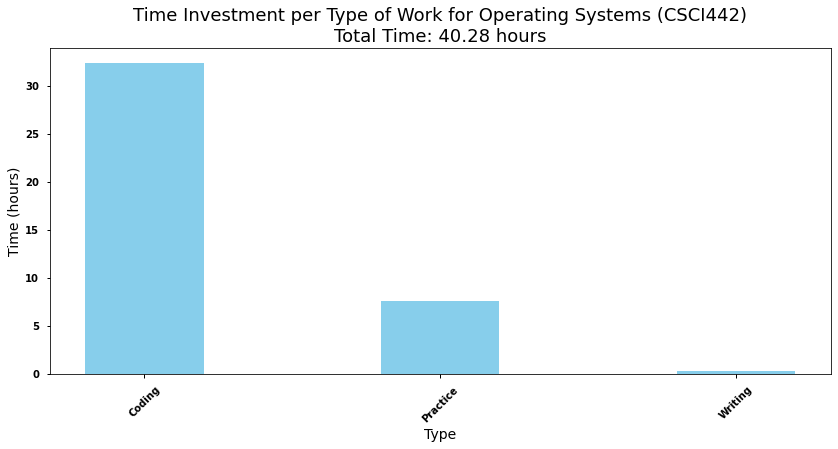

Course: OS, Total Time = 40.28 hours
Coding: 32.36 hours (80.33%)
Practice: 7.63 hours (18.94%)
Writing: 0.29 hours (0.73%)
GenAI & Art


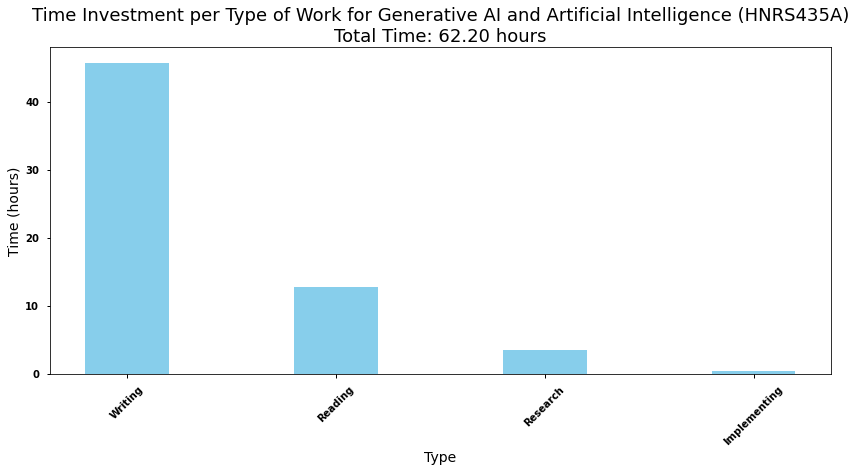

Course: GenAI & Art, Total Time = 62.20 hours
Writing: 45.68 hours (73.44%)
Reading: 12.75 hours (20.49%)
Research: 3.45 hours (5.54%)
Implementing: 0.33 hours (0.53%)
SWE


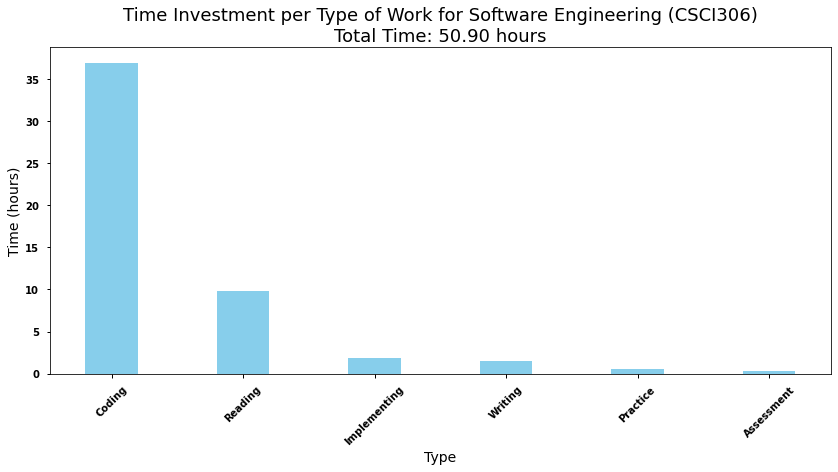

Course: SWE, Total Time = 50.90 hours
Coding: 36.91 hours (72.50%)
Reading: 9.86 hours (19.37%)
Implementing: 1.87 hours (3.67%)
Writing: 1.47 hours (2.88%)
Practice: 0.50 hours (0.99%)
Assessment: 0.30 hours (0.58%)
Algorithms


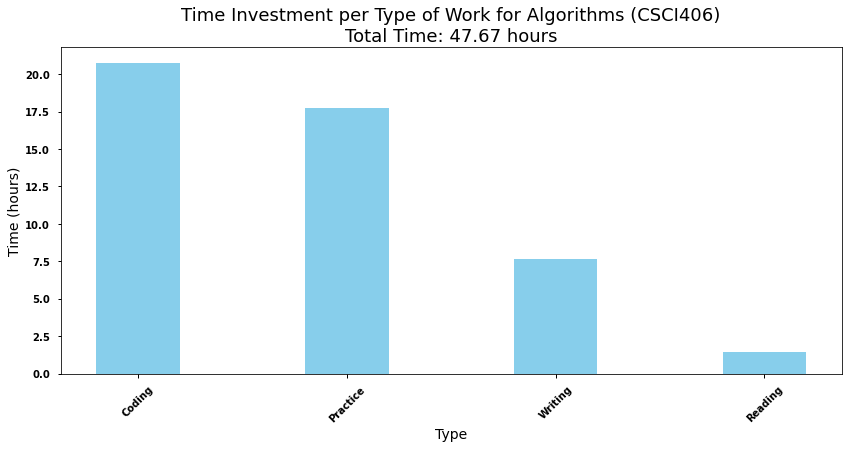

Course: Algorithms, Total Time = 47.67 hours
Coding: 20.76 hours (43.54%)
Practice: 17.76 hours (37.26%)
Writing: 7.69 hours (16.12%)
Reading: 1.47 hours (3.07%)


In [599]:
for course in set(total_time_df['Project']):
    print(course)
    print_plot(total_time_df, class_df, course, save = True)
    print(calc_stats(total_time_df, course))